# RED WINE QUALITY

##### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
rw = pd.read_csv(r'C:\Users\ASUS\Downloads\datasets_4458_8204_winequality-red.csv')

## Data Information:

fixed acidity: :most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines.

residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

chlorides: the amount of salt in the wine.

free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

density: the density of wine is close to that of water depending on the percent alcohol and sugar content.

pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

alcohol: the percent alcohol content of the wine.

quality: output variable (based on sensory data, score between 0 and 10).

##### DATA PREPROCESSING

In [3]:
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
rw.columns = rw.columns.str.replace('.','_')

In [5]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
rw.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

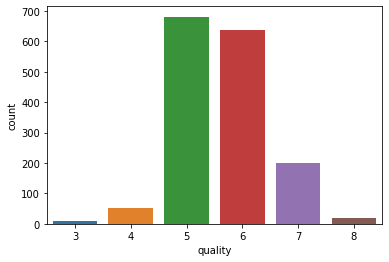

In [7]:
sb.countplot(rw['quality'])
rw['quality'].value_counts()

In [8]:
corr = rw.corr()['quality'].sort_values(ascending = True)
corr

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

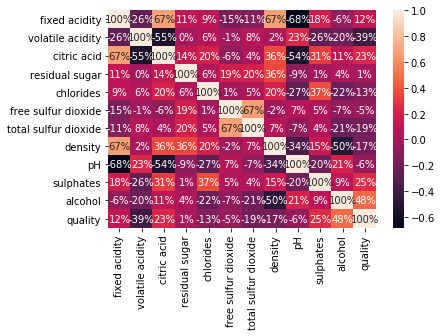

In [9]:
#correlations between features in percentage

sb.heatmap(rw.corr(),annot=True, fmt='.0%')

In [10]:
print(abs(corr)>0.25)

volatile acidity         True
total sulfur dioxide    False
density                 False
chlorides               False
pH                      False
free sulfur dioxide     False
residual sugar          False
fixed acidity           False
citric acid             False
sulphates                True
alcohol                  True
quality                  True
Name: quality, dtype: bool


##### FINAL SELECTION OF FACTORS THAT HIGHLY INFLUENCE THE QUALITY OF WINE

In [11]:
corr[abs(corr)>0.25]

volatile acidity   -0.390558
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

##### REGRESSION MODELS FOR PREDICTION

In [15]:
#separating the dependant and independant variables and splitting the train,test set
X = rw.iloc[:,[1,9,10]]
#X = rw.loc[:,['alcohol','sulphates','volatile_acidity']]
#Y = rw.loc[:,['quality']]
Y = rw.iloc[:,11]
X_train , X_test , y_train ,y_test = train_test_split(X , Y , test_size = 0.30 ,random_state = 35)





##### LINEAR REGRESSION MODEL 

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
prediction = np.round(prediction)

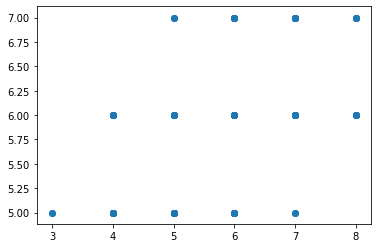

In [17]:
plt.scatter(y_test,prediction)

In [18]:
cm_lr = confusion_matrix(y_test,prediction)
cm_lr

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  10,   7,   0,   0],
       [  0,   0, 130,  70,   2,   0],
       [  0,   0,  54, 129,   6,   0],
       [  0,   0,   2,  47,  11,   0],
       [  0,   0,   0,   6,   4,   0]], dtype=int64)

##### DECISION TREE REGRESSOR

In [19]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
prediction_dt = regressor.predict(X_test)
prediction_dt = np.round(prediction_dt)

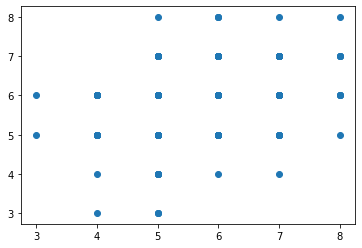

In [20]:
plt.scatter(y_test,prediction_dt)

In [21]:
cm_dtr = confusion_matrix(y_test,prediction_dt)
cm_dtr

array([[  0,   0,   1,   1,   0,   0],
       [  1,   1,   7,   8,   0,   0],
       [  3,   6, 132,  52,   8,   1],
       [  0,   1,  40, 118,  27,   3],
       [  0,   1,   6,  19,  33,   1],
       [  0,   0,   1,   4,   4,   1]], dtype=int64)

##### RSME OF MODELS

###### RSME OF LINEAR REGRESSION MODEL

In [23]:
RSME = sqrt(mean_squared_error(y_test,prediction))
print(RSME)

0.7458216945088149


###### RSME OF DECISION TREE REGRESSOR MODEL

In [24]:
RSME = sqrt(mean_squared_error(y_test,prediction_dt))
print(RSME)

0.8278989471346528
